In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with ZipFile('../data/train.csv.zip') as z:
    with z.open('train.csv') as f:
        train_df = pd.read_csv(f)

In [15]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [3]:
from catboost import CatBoostRegressor

In [4]:
from importlib import reload

In [5]:
import features
reload(features)
from features import extract_features, get_train_vgg16

In [6]:
import submission
reload(submission)
from submission import create_submission

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
def train_test_catboost(model, X, y, iscat):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train, iscat)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    return model, error
    

# Desription

All catboost submissions with different features

### 1

In [43]:
name, features, iscat = extract_features([train_df], ['baseline', 'date_features', 'isnull_features'])
iscat = np.where(iscat)[0]
X = np.vstack(features).T
y = train_df['deal_probability']

In [29]:
model, error = train_test_catboost(CatBoostRegressor(verbose=10), X, y, iscat)

0:	learn: 0.2917467	total: 1.73s	remaining: 28m 46s
10:	learn: 0.2687958	total: 15.3s	remaining: 22m 55s
20:	learn: 0.2551326	total: 28s	remaining: 21m 44s
30:	learn: 0.2465182	total: 44.1s	remaining: 22m 59s
40:	learn: 0.2414150	total: 1m 1s	remaining: 23m 50s
50:	learn: 0.2381821	total: 1m 18s	remaining: 24m 23s
60:	learn: 0.2361899	total: 1m 35s	remaining: 24m 28s
70:	learn: 0.2349632	total: 1m 52s	remaining: 24m 27s
80:	learn: 0.2341459	total: 2m 9s	remaining: 24m 29s
90:	learn: 0.2335643	total: 2m 28s	remaining: 24m 46s
100:	learn: 0.2331247	total: 2m 46s	remaining: 24m 40s
110:	learn: 0.2327304	total: 3m 6s	remaining: 24m 51s
120:	learn: 0.2324335	total: 3m 26s	remaining: 24m 57s
130:	learn: 0.2321549	total: 3m 45s	remaining: 24m 57s
140:	learn: 0.2319426	total: 4m 4s	remaining: 24m 49s
150:	learn: 0.2317454	total: 4m 22s	remaining: 24m 34s
160:	learn: 0.2315600	total: 4m 40s	remaining: 24m 22s
170:	learn: 0.2313801	total: 4m 58s	remaining: 24m 5s
180:	learn: 0.2312079	total: 5m 

In [33]:
error

0.22727617934252842

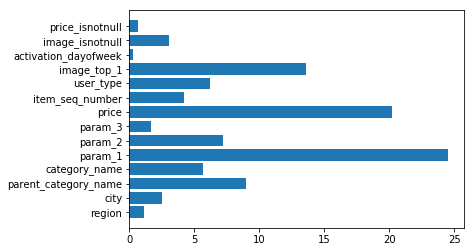

In [39]:
label_y = np.arange(len(name))
plt.barh(label_y, model.feature_importances_)
plt.yticks(label_y, name);

In [44]:
_, s_features, s_iscat = extract_features([test_df], ['baseline', 'date_features', 'isnull_features'])
s_X = np.vstack(s_features).T

In [45]:
cb = CatBoostRegressor(verbose=10)
cb.fit(X, y, iscat)

0:	learn: 0.2919584	total: 2.42s	remaining: 40m 18s
10:	learn: 0.2689393	total: 20.7s	remaining: 31m 4s
20:	learn: 0.2550392	total: 40.4s	remaining: 31m 23s
30:	learn: 0.2464586	total: 1m 4s	remaining: 33m 33s
40:	learn: 0.2413733	total: 1m 31s	remaining: 35m 29s
50:	learn: 0.2381675	total: 1m 56s	remaining: 36m 15s
60:	learn: 0.2361620	total: 2m 22s	remaining: 36m 40s
70:	learn: 0.2348992	total: 2m 49s	remaining: 36m 53s
80:	learn: 0.2340350	total: 3m 16s	remaining: 37m 9s
90:	learn: 0.2334528	total: 3m 46s	remaining: 37m 45s
100:	learn: 0.2330195	total: 4m 13s	remaining: 37m 37s
110:	learn: 0.2326169	total: 4m 40s	remaining: 37m 24s
120:	learn: 0.2323149	total: 5m 7s	remaining: 37m 10s
130:	learn: 0.2320583	total: 5m 35s	remaining: 37m 8s
140:	learn: 0.2318468	total: 6m 5s	remaining: 37m 8s
150:	learn: 0.2316489	total: 6m 42s	remaining: 37m 45s
160:	learn: 0.2314709	total: 7m 13s	remaining: 37m 41s
170:	learn: 0.2312972	total: 7m 50s	remaining: 37m 58s
180:	learn: 0.2311415	total: 8m

In [52]:
create_submission(cb.predict(s_X), '../submissions/', 'catboost', test_df)

### 2 ['baseline', 'isnull_features', 'train_vgg16pca100']

In [9]:
name, features, iscat = extract_features([train_df], ['baseline', 'isnull_features', 'train_vgg16pca100'])
iscat = np.where(iscat)[0]
y = train_df['deal_probability'].copy().as_matrix()
del train_df

In [10]:
features = [f.reshape(-1, 1) if len(f.shape) != 2 else f for f in features]

C:\Data\Soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [11]:
features = np.hstack(features)

In [12]:
cb = CatBoostRegressor(verbose=10, task_type='GPU')

In [13]:
cb.fit(features, y, iscat)

0:	total: 734ms	remaining: 12m 13s
1:	total: 1.34s	remaining: 11m 10s
2:	total: 1.98s	remaining: 10m 59s
3:	total: 2.75s	remaining: 11m 24s
4:	total: 3.47s	remaining: 11m 30s
5:	total: 4.17s	remaining: 11m 31s
6:	total: 4.78s	remaining: 11m 18s
7:	total: 5.53s	remaining: 11m 25s
8:	total: 6.17s	remaining: 11m 19s
9:	learn: 0.270154387	total: 6.88s	remaining: 11m 20s
10:	total: 7.58s	remaining: 11m 21s
11:	total: 8.31s	remaining: 11m 24s
12:	total: 9.09s	remaining: 11m 30s
13:	total: 9.95s	remaining: 11m 41s
14:	total: 10.8s	remaining: 11m 47s
15:	total: 11.4s	remaining: 11m 41s
16:	total: 12.1s	remaining: 11m 37s
17:	total: 12.9s	remaining: 11m 43s
18:	total: 13.8s	remaining: 11m 51s
19:	learn: 0.2550826244	total: 14.4s	remaining: 11m 43s
20:	total: 15s	remaining: 11m 37s
21:	total: 15.5s	remaining: 11m 29s
22:	total: 16.2s	remaining: 11m 27s
23:	total: 17s	remaining: 11m 33s
24:	total: 17.7s	remaining: 11m 29s
25:	total: 18.3s	remaining: 11m 24s
26:	total: 19.1s	remaining: 11m 27s
27:

In [14]:
del features

In [19]:
test_name, test_features, test_iscat = extract_features([test_df], ['baseline', 'isnull_features', 'test_vgg16pca100'])

In [20]:
test_features = [f.reshape(-1, 1) if len(f.shape) != 2 else f for f in test_features]

C:\Data\Soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [22]:
test_features = np.hstack(test_features)

In [23]:
create_submission(cb.predict(test_features), '../submissions/', 'catboost_baseline_isnull_features_train_vgg16pca100', test_df)

### 3 ['baseline', 'isnull_features', 'train_vgg16']

In [9]:
name, features, iscat = extract_features([train_df], ['baseline', 'isnull_features', 'train_vgg16'])
iscat = np.where(iscat)[0]
y = train_df['deal_probability'].copy().as_matrix()
del train_df

In [10]:
features = [f.reshape(-1, 1) if len(f.shape) != 2 else f for f in features]

C:\Data\Soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [ ]:
features = np.hstack(features)

In [ ]:
cb = CatBoostRegressor(verbose=10, task_type='GPU')

In [15]:
cb.fit(features, y, iscat)

0:	total: 844ms	remaining: 14m 2s
1:	total: 1.73s	remaining: 14m 25s
2:	total: 2.69s	remaining: 14m 53s
3:	total: 3.67s	remaining: 15m 14s
4:	total: 4.5s	remaining: 14m 55s
5:	total: 5.48s	remaining: 15m 8s
6:	total: 6.33s	remaining: 14m 57s
7:	total: 7.28s	remaining: 15m 2s
8:	total: 8.22s	remaining: 15m 5s
9:	learn: 0.2702246633	total: 9.17s	remaining: 15m 8s
10:	total: 9.98s	remaining: 14m 57s
11:	total: 11.1s	remaining: 15m 14s
12:	total: 12.2s	remaining: 15m 28s
13:	total: 13.3s	remaining: 15m 39s
14:	total: 14.3s	remaining: 15m 36s
15:	total: 15.1s	remaining: 15m 31s
16:	total: 16.3s	remaining: 15m 43s
17:	total: 17.3s	remaining: 15m 42s
18:	total: 18.1s	remaining: 15m 35s
19:	learn: 0.2551338847	total: 19.1s	remaining: 15m 34s
20:	total: 20s	remaining: 15m 32s
21:	total: 21.1s	remaining: 15m 36s
22:	total: 22.1s	remaining: 15m 37s
23:	total: 22.9s	remaining: 15m 32s
24:	total: 24s	remaining: 15m 34s
25:	total: 25s	remaining: 15m 37s
26:	total: 25.9s	remaining: 15m 34s
27:	total:

CatboostError: bad allocation

In [16]:
features.shape

(1503424, 525)

In [17]:
del features